In [1]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
plt.rcParams['figure.figsize'] = (12, 4)

In [3]:
# import the file of  population vs profit made by restaurants
df = pd.read_csv(r"C:\Users\Lenovo\Desktop\gui prj\ML.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   6.1101  96 non-null     float64
 1   17.592  96 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


In [5]:
df.head(100)

,6.1101,17.592
0,5.5277,9.13020
1,8.5186,13.66200
2,7.0032,11.85400
3,5.8598,6.82330
4,8.3829,11.88600
...,...,...
91,5.8707,7.20290
92,5.3054,1.98690
93,8.2934,0.14454
94,13.3940,9.05510


In [6]:
df = df.rename(columns={"6.1101": "population", "17.592":"profit"})

In [8]:
df.sort_values("profit", ascending=False)

,population,profit
28,22.2030,24.14700
24,18.9450,22.63800
20,20.2700,21.76700
68,20.3410,20.99200
61,21.2790,17.92900
...,...,...
93,8.2934,0.14454
60,5.1793,-0.74279
29,5.2524,-1.22000
54,6.3589,-1.42110


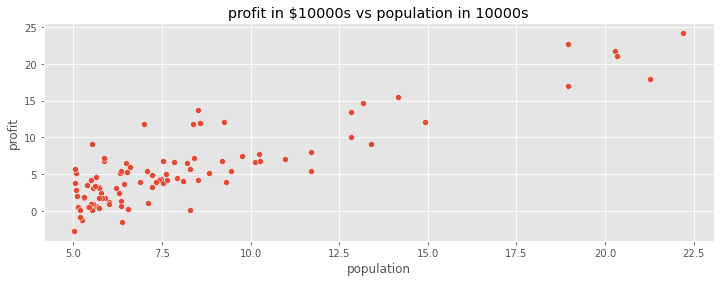

In [171]:
ax = sns.scatterplot(x="population", y="profit", data =df)
ax.set_title("profit in $10000s vs population in 10000s");

In [64]:
def cost_function(X, y, theta):
    m = len(y)
    y_pred = X.dot(theta)
    S_error = (y_pred - y) ** 2
    
    return 1 / (2*m) * np.sum(S_error)

m = df.profit.size
X = np.append(np.ones((m,1)), df.population.values.reshape(m,1), axis=1)
y = df.profit.values.reshape(m,1)
theta = np.zeros((2,1))

In [67]:
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    costs =[]
    for i in range(iterations):
        y_pred = X.dot(theta)
        error = np.dot(X.transpose(), (y_pred - y))
        theta -= alpha * 1/m * error
        costs.append(cost_function(X, y, theta))
    return theta, costs    
    
    

In [119]:
theta = np.zeros((2,1))
theta, costs = gradient_descent(X, y, theta, 0.01, 20000)

print(theta[0,0], theta[1,0])

-4.211504005423841 1.2135472539083334


In [81]:
from mpl_toolkits.mplot3d import Axes3D

In [120]:
theta_0 = np.linspace(-10, 10, 100)
theta_1 = np.linspace(-1, 5, 100)

cost_values = np.zeros((100, 100))
for i in range(len(theta_0)):
    for j in range(len(theta_1)):
        t = np.array([theta_0[i], theta_1[j]])
        cost_values[i, j] = cost_function(X, y, t)
        

Text(0.5, 0, 'J$\\Theta$')

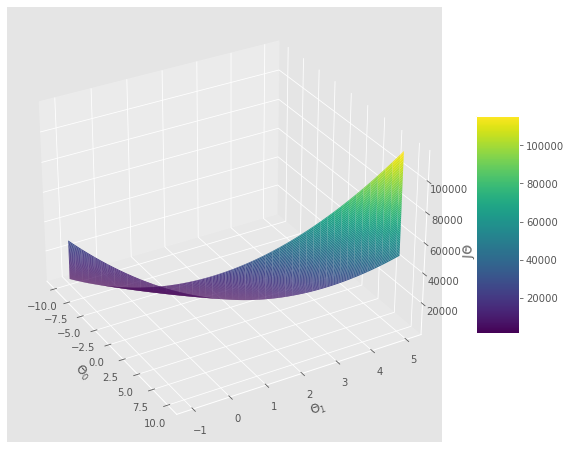

In [121]:
fig = plt.figure(figsize = (12, 8))
ax = fig.gca(projection = '3d')

surf = ax.plot_surface(theta_0, theta_1, cost_values, cmap = 'viridis')
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.view_init(30, 330)

plt.xlabel("$\Theta_0$")
plt.ylabel("$\Theta_1$")
ax.set_zlabel("J$\Theta$")

Text(0.5, 1.0, 'values of cost function')

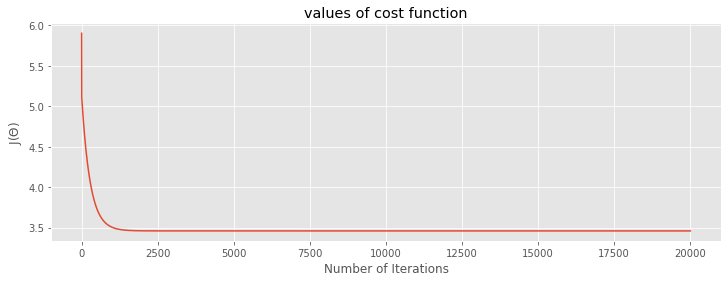

In [122]:
plt.plot(costs)
plt.xlabel("Number of Iterations")
plt.ylabel("J($\Theta$)")
plt.title("values of cost function")

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Linear Regression Fit')

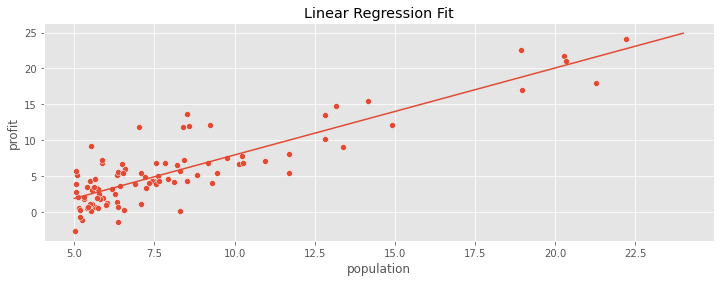

In [143]:
x_values = [x for x in range(5,25)]
y_values = [x*theta[1,0] + theta[0,0] for x in x_values]

sns.scatterplot(x="population", y="profit", data=df)
sns.lineplot(x_values, y_values)

plt.title("Linear Regression Fit")

Predicting Values

In [158]:
def pred(x, theta):
    y_pred = x.dot(theta)
    return y_pred

array([0.64268501])

In [169]:
pred_1 = pred(np.array([1, 4]), theta)*1000
pred_2 = pred(np.array([1, 8.5]), theta)*1000
print("For a population of 4,000 people, the model predicts a profit of $" + str(round(pred_1[0], 0)))
print("For a population of 8,500 people, the model predicts a profit of $" + str(round(pred_2[0], 0)))

For a population of 4,000 people, the model predicts a profit of $643.0
For a population of 8,500 people, the model predicts a profit of $6104.0
